In [ ]:
# GENERATE docs/chars.txt TABLE OF ORDINALS => SYMBOL MAPPINGS
from benchmark.util import UniUtil

lines = [""]
for i in range(32, 2**16):
    content = (UniUtil.chr(i).encode("utf-8").rjust(4) + " => " + str(i).ljust(7)).ljust(4+4+7)
    if len(lines[-1]) + len(content) <= 120:
        lines[-1] += content
    else:
        lines[-1] += "\n"
        lines.append(content)



file = open("docs/chars.txt", "w")
file.write(reduce(lambda p,c: p+c, lines, ""))
file.close()

In [1]:
# FAdo BACKTRACKING DEMO
from benchmark.convert import Converter
from timeit import timeit, time

evil = "(a + a)*"
re = Converter().math(evil)
startT = time.time()
i = 0

print "   iter        derivative  backtrack"
while startT + 60 > time.time():
    word = "a"*i + "b"
    print "'a'*{0:<2} + 'b'".format(i).ljust(10),
    print "{:10.4f}".format(timeit(stmt=lambda: re.evalWordP(word), number=1)),
    print "{:10.4f}".format(timeit(stmt=lambda: re.evalWordPBacktrack(word), number=1))
    i += 1

   iter        derivative  backtrack
'a'*0  + 'b'     0.0001     0.0000
'a'*1  + 'b'     0.0001     0.0000
'a'*2  + 'b'     0.0001     0.0000
'a'*3  + 'b'     0.0001     0.0000
'a'*4  + 'b'     0.0001     0.0001
'a'*5  + 'b'     0.0002     0.0002
'a'*6  + 'b'     0.0002     0.0004
'a'*7  + 'b'     0.0003     0.0007
'a'*8  + 'b'     0.0003     0.0015
'a'*9  + 'b'     0.0004     0.0033
'a'*10 + 'b'     0.0008     0.0080
'a'*11 + 'b'     0.0009     0.0167
'a'*12 + 'b'     0.0009     0.0211
'a'*13 + 'b'     0.0007     0.0286
'a'*14 + 'b'     0.0008     0.0581
'a'*15 + 'b'     0.0016     0.1244
'a'*16 + 'b'     0.0009     0.2360
'a'*17 + 'b'     0.0011     0.4720
'a'*18 + 'b'     0.0011     0.9341
'a'*19 + 'b'     0.0016     1.9016
'a'*20 + 'b'     0.0017     3.8947
'a'*21 + 'b'     0.0015     7.8399
'a'*22 + 'b'     0.0016    15.9349
'a'*23 + 'b'     0.0020    32.7979


In [3]:
from FAdo.reex import atom, concat

def f(n):
    if n == 0:
        return atom("a")
    return concat(arg1=f(n - 1), arg2=f(n - 1))

depth = 10
wordlen = 2**(depth + 1)
re = concat(arg1=f(depth), arg2=f(depth))

print "accepts only", wordlen, "a's"
print re.evalWordP("a"*wordlen)

accepts only 2048 a's
True


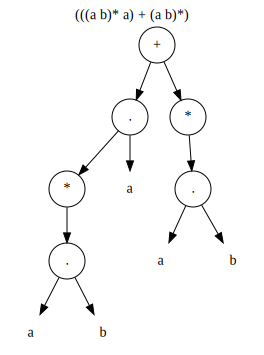

All 6 words were properly accepted!


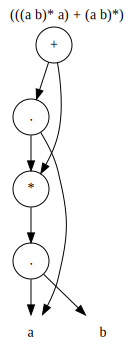

In [1]:
from benchmark.convert import Converter
c = Converter()

re = c.prog("((ab)*a)|(ab)*", partialMatch=False)
re.display()
words = re.pairGen()

re.compress()
for w in words:
    assert re.evalWordPBacktrack(w) == True
    assert re.evalWordP(w) == True
print "All", len(words), "words were properly accepted!"
re.display()
